In [7]:
!pip install pandas matplotlib


In [8]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [9]:
df1 = pd.read_csv(r"C:\Users\S YUVASRI\Downloads\Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [10]:
df1.shape

(13320, 9)

In [11]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [12]:
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [14]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df3.shape

(13246, 5)

In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])

C:\Users\S YUVASRI\AppData\Local\Temp\ipykernel_456\2032863644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: x.split(' ')[0])


In [18]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [20]:
df3['bhk'] = pd.to_numeric(df3['bhk'], errors='coerce')  # Convert to numeric
df3 = df3.dropna(subset=['bhk'])  # Remove rows where bhk conversion failed
df3['bhk'] = df3['bhk'].astype(int)  # Convert to int

# Now apply the filter
filtered_df = df3[df3['bhk'] > 20]
print(filtered_df)

df3[df3.bhk>20]

                       location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43


C:\Users\S YUVASRI\AppData\Local\Temp\ipykernel_456\1808493542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = pd.to_numeric(df3['bhk'], errors='coerce')  # Convert to numeric


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [21]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2067,), dtype=object)

In [22]:
def is_float(x):
    try:
       float(x)
    except:
       return False
    return True

In [23]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [24]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num('2166')

2166.0

In [26]:
convert_sqft_to_num('2166 - 2850')

2508.0

In [27]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [28]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [29]:
(2100+2850)/2

2475.0

In [30]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [31]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [32]:
len(df5.location.unique())

1304

In [33]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                   535
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               266
Thanisandra                  236
                            ... 
adigondanhalli                 1
akshaya nagar t c palya        1
anjananager magdi road         1
arudi                          1
2Electronic City Phase II      1
Name: location, Length: 1293, dtype: int64

In [34]:
len(location_stats[location_stats<=10])

1052

In [35]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                  10
Gunjur Palya                 10
BTM 1st Stage                10
Sadashiva Nagar              10
Kalkere                      10
                             ..
adigondanhalli                1
akshaya nagar t c palya       1
anjananager magdi road        1
arudi                         1
2Electronic City Phase II     1
Name: location, Length: 1052, dtype: int64

In [36]:
len(df5.location.unique())

1293

In [37]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [38]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [39]:
df5[df5.total_sqft/df5.bhk<100].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
349,other,3 Bedroom,11.0,3.0,74.0,3,672727.272727
770,other,9 Bedroom,600.0,9.0,190.0,9,31666.666667
857,Vijayanagar,8 Bedroom,600.0,4.0,72.0,8,12000.000000
992,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4,28571.428571


In [40]:
df5.shape

(13246, 7)

In [41]:
df6 = df5[~(df5.total_sqft/df5.bhk<100)]
df6.shape

(13206, 7)

In [42]:
df6.price_per_sqft.describe()

count     13160.000000
mean       6666.830652
std        4508.228739
min         267.829813
25%        4262.948207
50%        5425.015738
75%        7285.438507
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out    

df7 = remove_pps_outliers(df6)
df7.shape

(10927, 7)

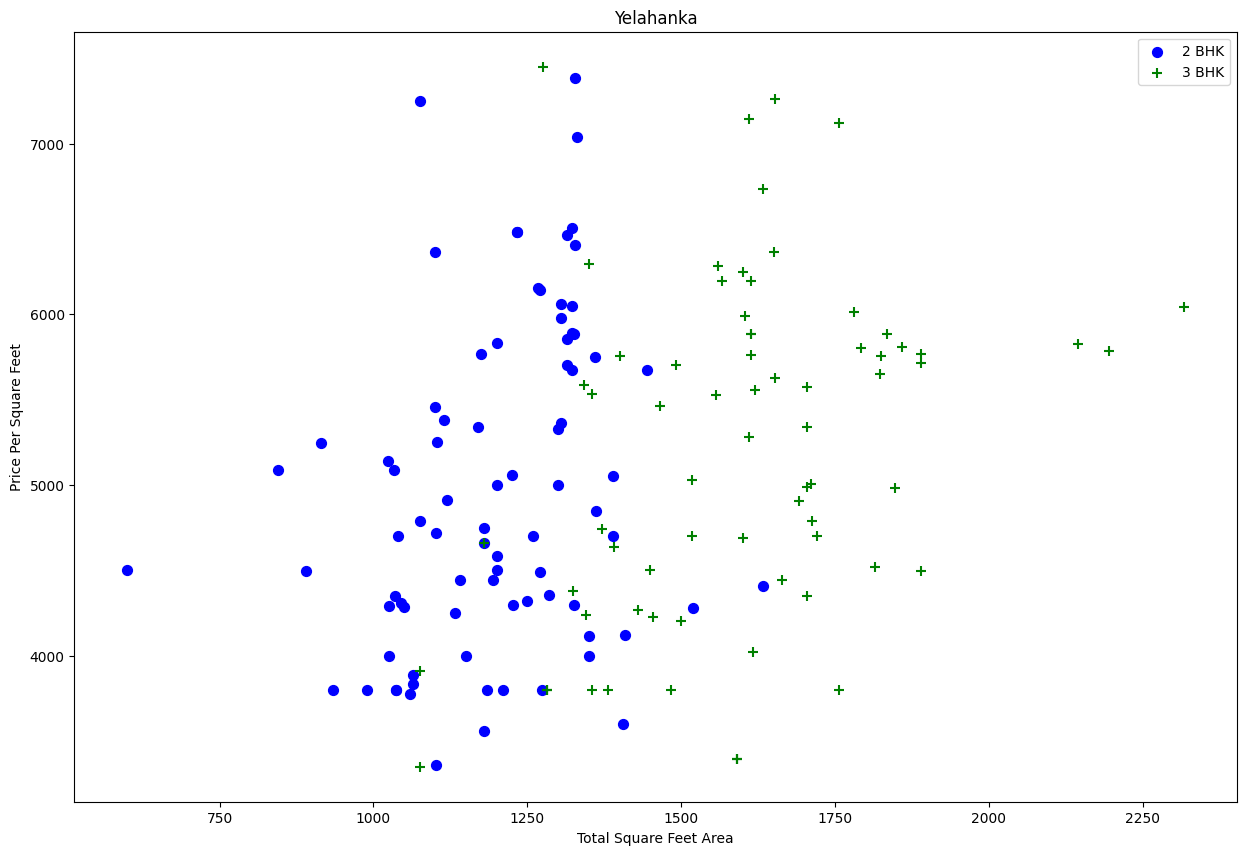

In [44]:
def plot_scatter_chart(df,location):
    bhk2= df[(df.location==location) & (df.bhk==2)]
    bhk3= df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Yelahanka")

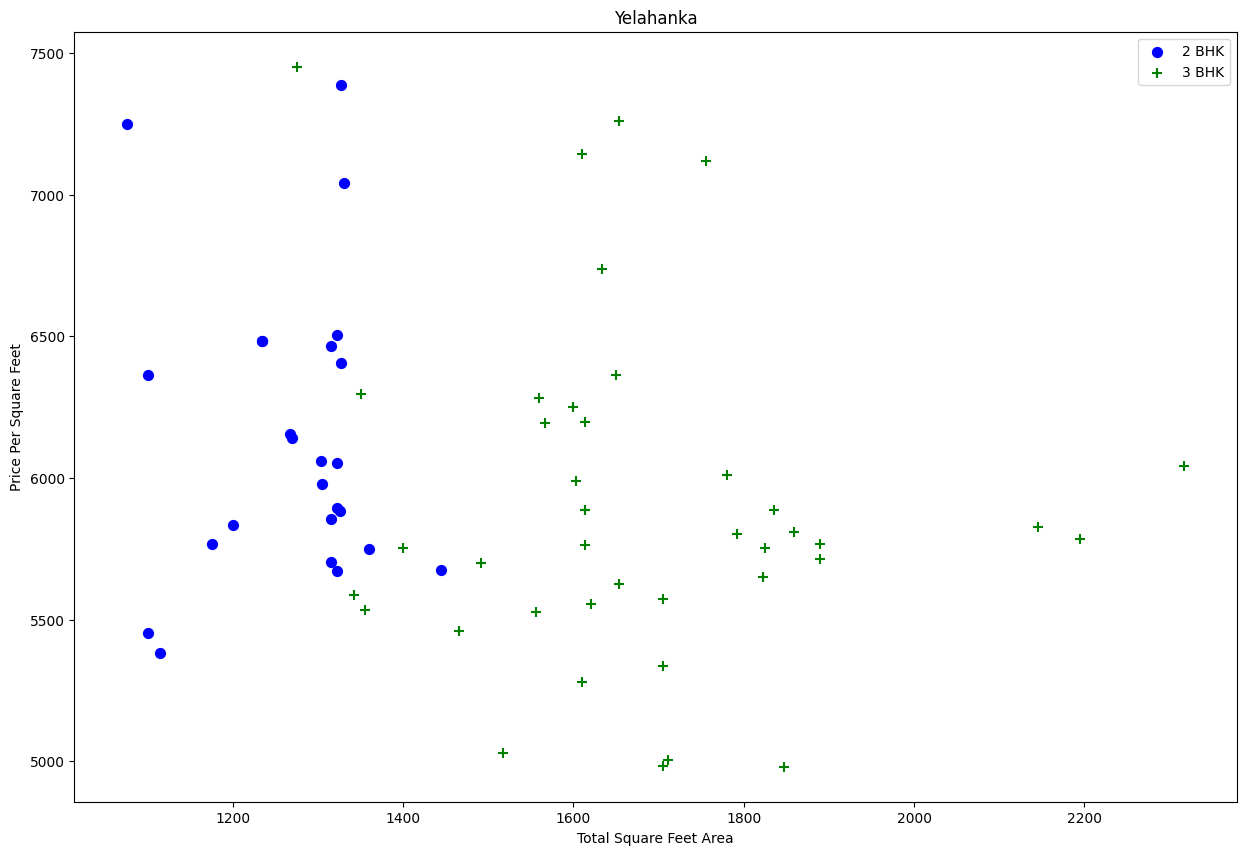

In [45]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')            

df8 = remove_bhk_outliers(df7)    
df8.shape
plot_scatter_chart(df8,"Yelahanka")

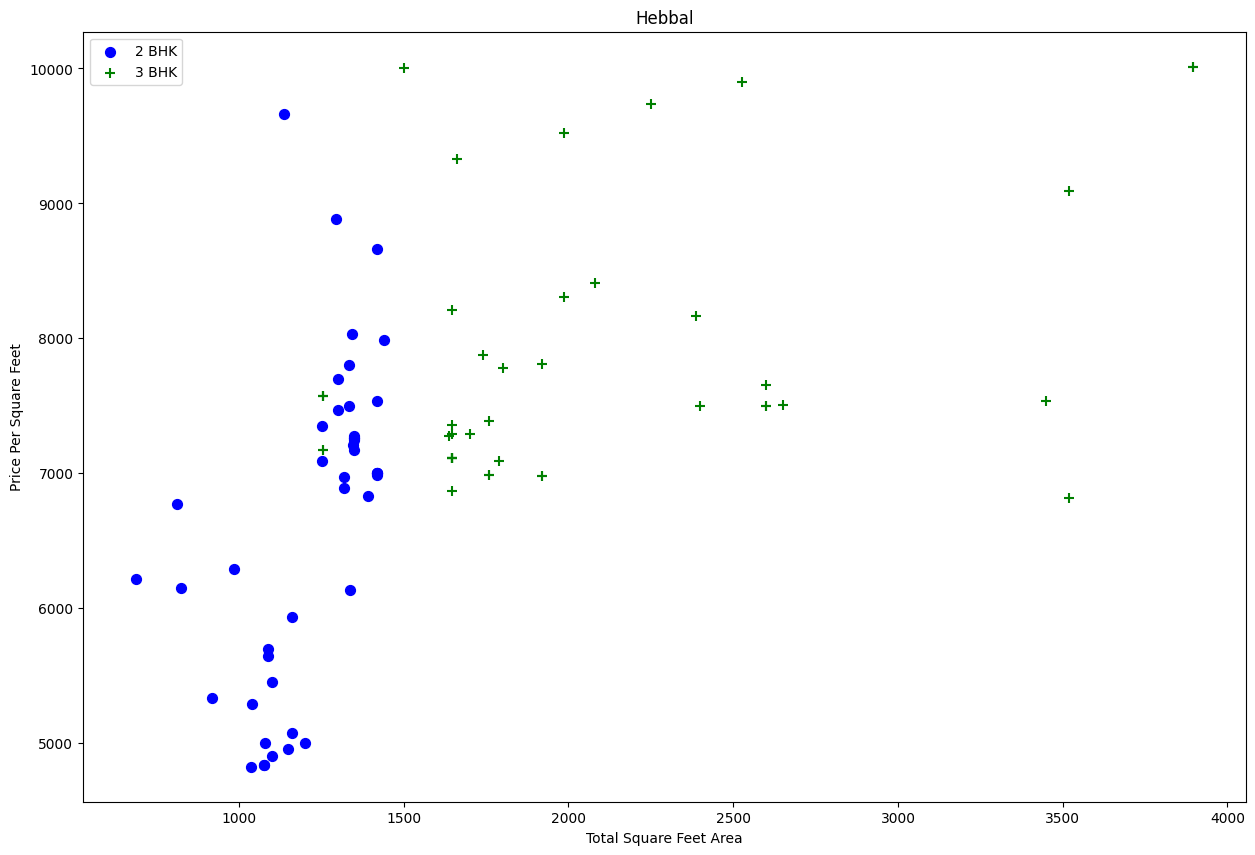

In [46]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

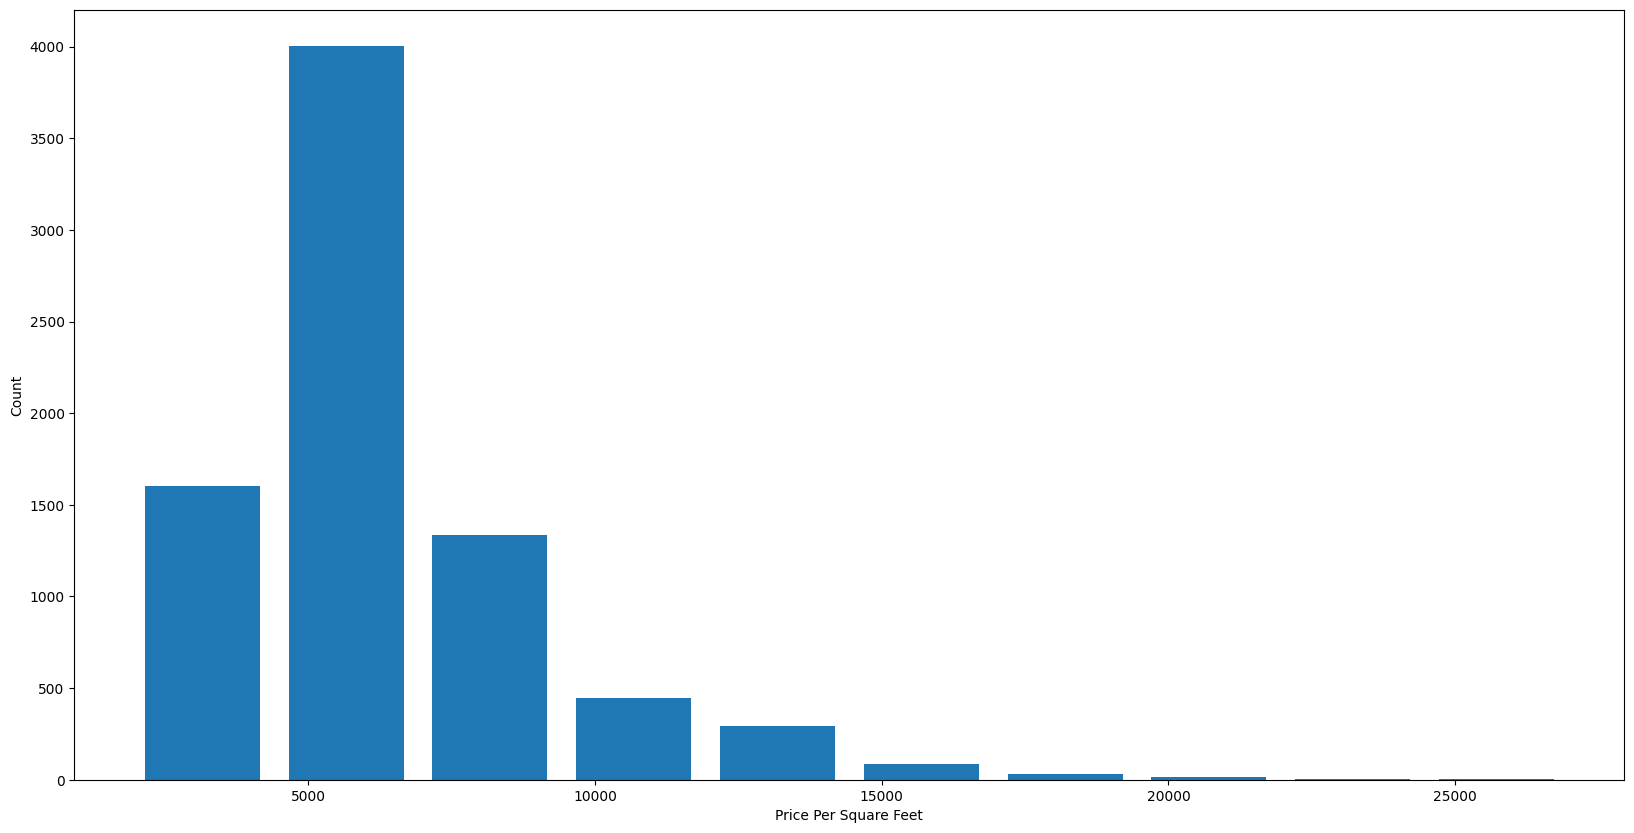

In [47]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [48]:

df8.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 27., 11.,
       16., 13.])

Text(0, 0.5, 'Count')

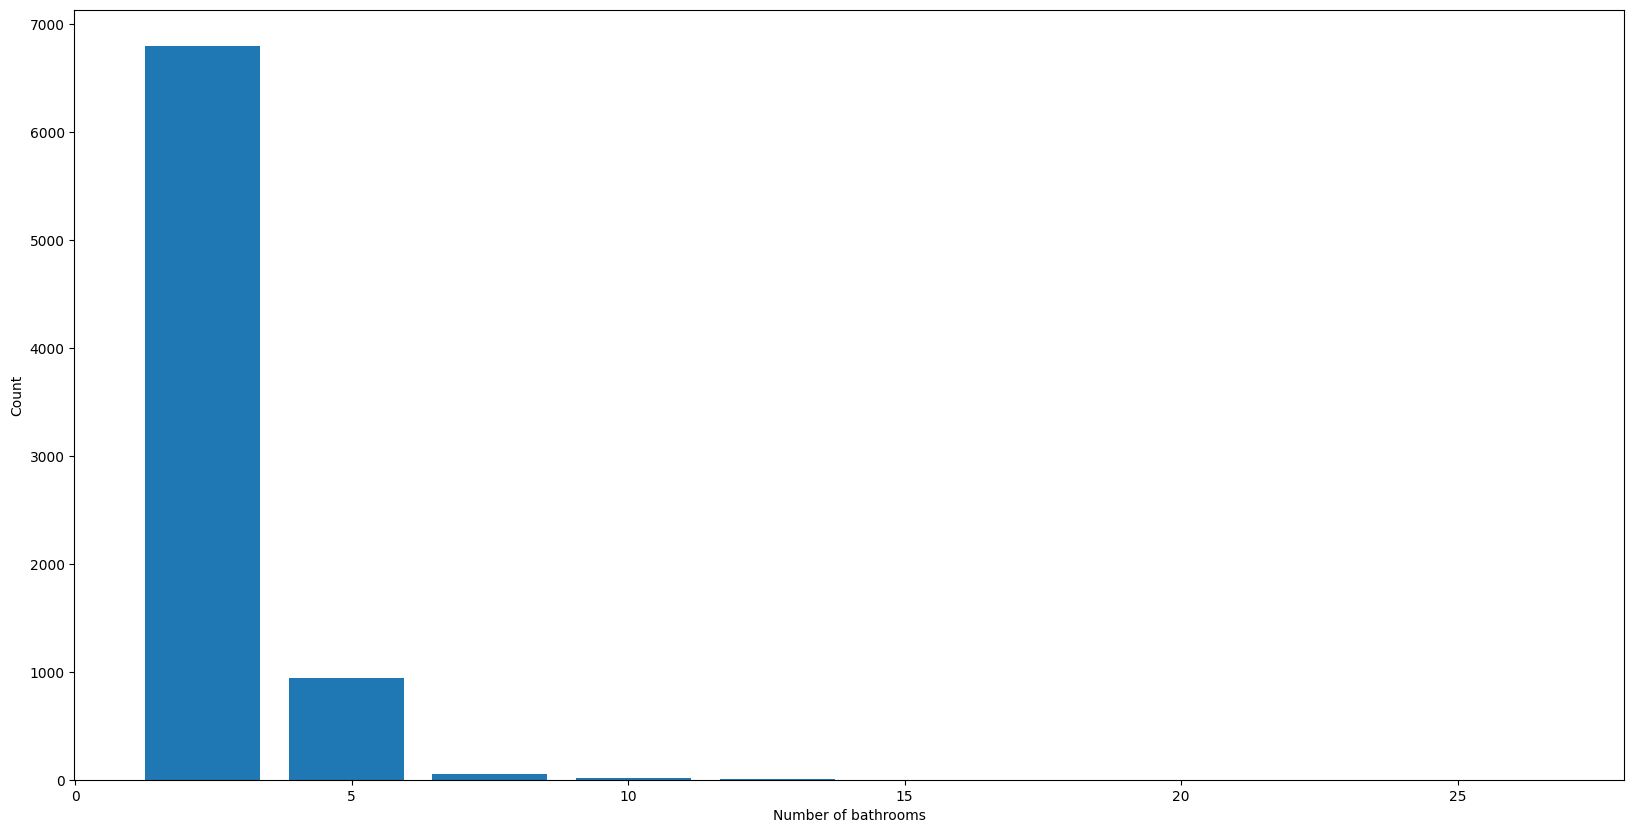

In [49]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [50]:

df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5640,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8748,other,27 BHK,8000.0,27.0,230.0,27,2875.000000
8753,other,11 Bedroom,1200.0,11.0,170.0,11,14166.666667
8801,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
9102,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9907,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10269,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [51]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1634,Chamrajpet,6 Bedroom,1500.0,9.0,230.0,6,15333.333333
1770,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5599,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7139,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8801,other,8 Bedroom,990.0,12.0,120.0,8,12121.212121
10283,other,6 Bedroom,1200.0,9.0,122.0,6,10166.666667


In [52]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7729, 7)

In [53]:

df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [54]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,125.0,6


In [55]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,6.0,125.0,6,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,930.0,4.0,85.0,7,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:

df12.shape

(7729, 245)

In [59]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,6.0,6,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:

X.shape

(7729, 244)

In [61]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    125.0
Name: price, dtype: float64

In [62]:

len(y)

7729

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8253708392208274

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.78390782, 0.80213844, 0.83669946, 0.79994602, 0.84617623])

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Removed 'normalize'
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Fixed 'mse' issue
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)  # Ensure X and y are correctly formatted
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Ensure X and y are properly formatted
X = np.array(X).reshape(-1, X.shape[1])
y = np.array(y).flatten()

# Run function
df_results = find_best_model_using_gridsearchcv(X, y)
print(df_results)


               model  best_score  \
0  linear_regression    0.813774   
1              lasso    0.669031   
2      decision_tree    0.702268   

                                         best_params  
0                                                 {}  
1                {'alpha': 1, 'selection': 'cyclic'}  
2  {'criterion': 'squared_error', 'splitter': 'be...  


In [67]:
import numpy as np
import pandas as pd

# Assuming X_train is a DataFrame before transformation
feature_names = list(X_train.columns)  # Store feature names separately

def predict_price(location, sqft, bath, bhk):    
    if location not in feature_names:
        raise ValueError(f"Location '{location}' not found in feature names")

    loc_index = feature_names.index(location)  # Get index from stored feature names

    x = np.zeros(len(feature_names))  # Use length of feature_names
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    # Convert NumPy array to DataFrame with correct column names
    return lr_clf.predict(pd.DataFrame([x], columns=feature_names))[0]

# Example Prediction
predict_price('1st Phase JP Nagar', 1000, 2, 2)



np.float64(83.4336051012234)

In [68]:

predict_price('1st Phase JP Nagar',1000, 3, 3)

np.float64(84.2946707609818)

In [69]:
predict_price('Indira Nagar',1000, 2, 2)

np.float64(175.1587922818046)

In [70]:
predict_price('Indira Nagar',1000, 3, 3)

np.float64(176.01985794156303)

In [71]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [72]:
import json
columns = {
    'data_columns': [col.lower() for col in feature_names] 
}

# Save to JSON
with open("columns.json", "w") as f:
    json.dump(columns, f)  


In [73]:
#chatgpt form now 

# Handling missing values
df2 = df2.dropna()

# Converting 'size' (e.g., '2 BHK') to numerical (only keeping the number)
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)

# Cleaning 'total_sqft' (handling ranges like "1000-1200")
def convert_sqft_to_num(x):
    try:
        if '-' in x:
            vals = x.split('-')
            return (float(vals[0]) + float(vals[1])) / 2
        return float(x)
    except:
        return None

df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2 = df2.dropna()  # Drop any remaining null values


In [74]:
# Creating a new feature 'price_per_sqft'
df2['price_per_sqft'] = df2['price'] * 100000 / df2['total_sqft']

# Handling 'location' by grouping less frequent locations into 'other'
location_stats = df2['location'].value_counts()
df2['location'] = df2['location'].apply(lambda x: x if location_stats[x] > 10 else 'other')

# One-hot encoding categorical columns
dummies = pd.get_dummies(df2['location'])
df3 = pd.concat([df2, dummies], axis=1)
df3.drop(['location', 'size'], axis=1, inplace=True)


In [75]:
!pip install seaborn


Dataset shape: (13320, 9)
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


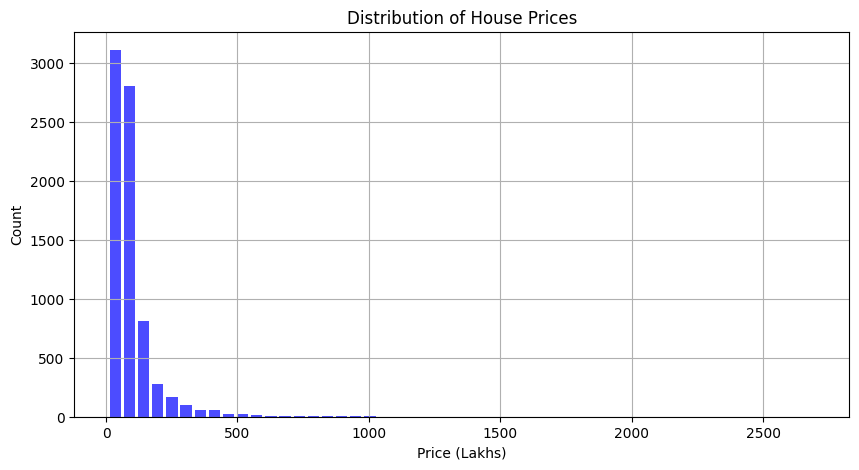

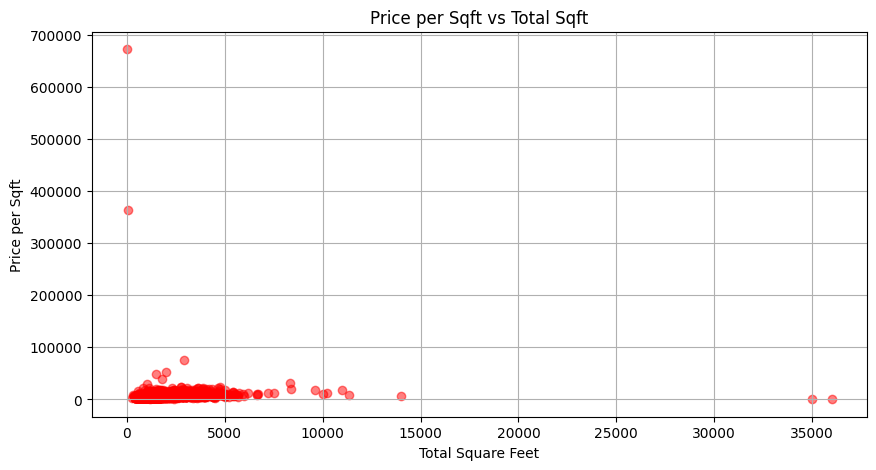

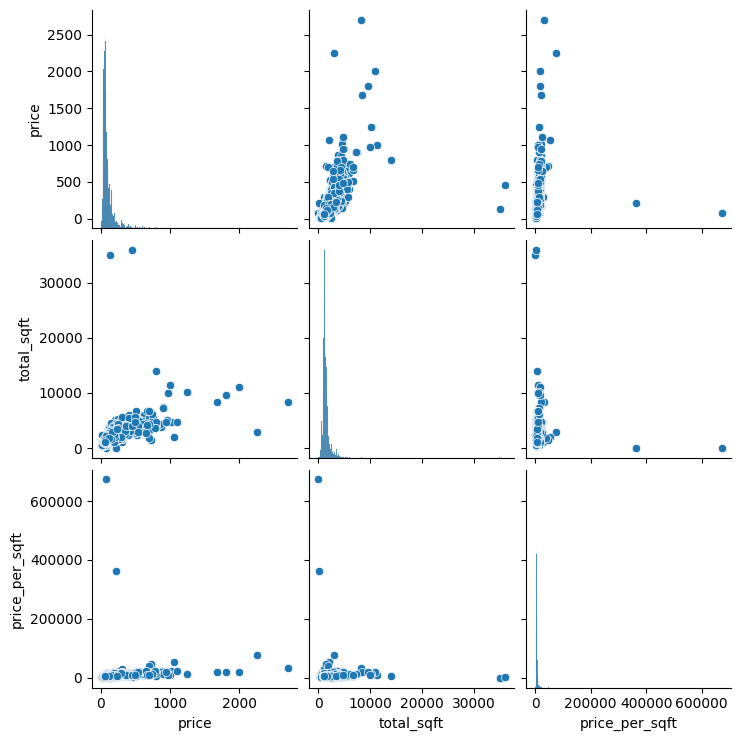

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (if not already loaded)
file_path = r"C:\Users\S YUVASRI\Downloads\Bengaluru_House_Data.csv"
df = pd.read_csv(file_path)

# Check dataset structure
print("Dataset shape:", df.shape)
print(df.head())

# Convert 'total_sqft' to numeric (Handle ranges like '1200-1300')
def convert_sqft_to_num(sqft):
    try:
        if '-' in sqft:
            nums = sqft.split('-')
            return (float(nums[0]) + float(nums[1])) / 2  # Take average for range
        return float(sqft)
    except:
        return np.nan  # If conversion fails, set as NaN

df['total_sqft'] = df['total_sqft'].astype(str).apply(convert_sqft_to_num)

# Remove NaN values
df.dropna(inplace=True)

# Create a new column for price per square foot
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# 🔹 Histogram - Distribution of House Prices
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50, rwidth=0.8, color='blue', alpha=0.7)
plt.xlabel("Price (Lakhs)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.grid(True)
plt.show()

# 🔹 Scatter plot - Price per Sqft vs Total Sqft
plt.figure(figsize=(10, 5))
plt.scatter(df['total_sqft'], df['price_per_sqft'], alpha=0.5, color='red')
plt.xlabel("Total Square Feet")
plt.ylabel("Price per Sqft")
plt.title("Price per Sqft vs Total Sqft")
plt.grid(True)
plt.show()

# 🔹 Pairplot for key features
sns.pairplot(df[['price', 'total_sqft', 'price_per_sqft']])
plt.show()


In [1]:
!pip install xgboost


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset
df = pd.read_csv(r"C:\Users\S YUVASRI\Downloads\Bengaluru_House_Data.csv")

# Drop unnecessary columns
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Extract BHK from 'size' column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Convert 'total_sqft' to numeric values
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])

# Create price per sqft column
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Handle location feature
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df['location'].value_counts()
location_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

# Remove outliers
df = df[~(df.total_sqft / df.bhk < 100)]
df = df[df.bath < df.bhk + 2]

# One-hot encoding for location
df = pd.get_dummies(df, columns=['location'], drop_first=True)

# Define features and target
X = df.drop(['price', 'size', 'price_per_sqft'], axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest and XGBoost models
rf_model = RandomForestRegressor(n_estimators=100, random_state=10)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=10)

rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate models
rf_score = rf_model.score(X_test_scaled, y_test)
xgb_score = xgb_model.score(X_test_scaled, y_test)

print(f"Random Forest R² Score: {rf_score}")
print(f"XGBoost R² Score: {xgb_score}")

# Hyperparameter tuning using GridSearchCV
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.7, 1]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=10), rf_params, cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(XGBRegressor(random_state=10), xgb_params, cv=5, n_jobs=-1)

rf_grid.fit(X_train_scaled, y_train)
xgb_grid.fit(X_train_scaled, y_train)

# Get best parameters and scores
rf_best_params = rf_grid.best_params_
rf_best_score = rf_grid.best_score_
xgb_best_params = xgb_grid.best_params_
xgb_best_score = xgb_grid.best_score_

print(f"Best Random Forest Params: {rf_best_params}, Best Score: {rf_best_score}")
print(f"Best XGBoost Params: {xgb_best_params}, Best Score: {xgb_best_score}")


Random Forest R² Score: 0.583965137437573
XGBoost R² Score: 0.6253636910302554
Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}, Best Score: 0.5900101650033821
Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}, Best Score: 0.627665764811991


In [5]:
import pickle
import json

# Save the trained model
with open("best_model.pkl", "wb") as f:
    pickle.dump(rf_grid.best_estimator_, f)  # Or xgb_grid.best_estimator_

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save feature column names
columns = ["sqft", "bath", "bhk"] + list(X.columns[3:])  # Adjust as per your data
with open("columns.json", "w") as f:
    json.dump({"data_columns": columns}, f)


In [7]:
import pickle
import json
import numpy as np

# Load trained model and scaler
with open("best_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Load column names
with open("columns.json", "r") as f:
    columns = json.load(f)["data_columns"]

def predict_price(location, sqft, bhk, bath):
    try:
        loc_index = columns.index(location.lower())
    except:
        loc_index = -1  # If location not found

    # Create input array
    x = np.zeros(len(columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1  # Set location index to 1

    # Scale input
    x_scaled = scaler.transform([x])

    return round(model.predict(x_scaled)[0], 2)

# Interactive input in Jupyter Notebook
location = input("Enter the location: ")
sqft = float(input("Enter total sqft: "))
bhk = int(input("Enter number of BHK: "))
bath = int(input("Enter number of bathrooms: "))

predicted_price = predict_price(location, sqft, bhk, bath)
print(f"🏡 Estimated Price: ₹{predicted_price} Lakhs")


Enter the location:  uttarhali
Enter total sqft:  1440
Enter number of BHK:  3
Enter number of bathrooms:  2


🏡 Estimated Price: ₹66.66 Lakhs


C:\Users\S YUVASRI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
